In [31]:
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show(cv_image):
    if cv_image.ndim == 2:
        plt.imshow(cv_image, cmap='gray')
    else:
        plt.imshow(imutils.opencv2matplotlib(cv_image))

In [2]:
image = cv2.imread("jp.png")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=322, depth=3


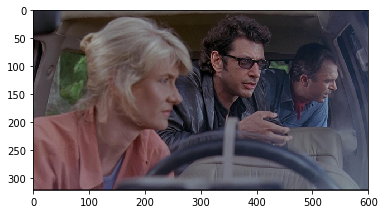

In [3]:
plt.imshow(imutils.opencv2matplotlib(image))

In [4]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


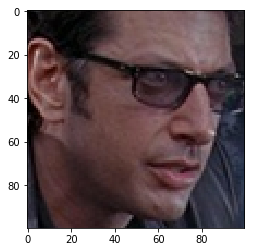

In [5]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[60:160, 320:420]
# cv2.imshow("ROI", roi)
# cv2.waitKey(0)
show(roi)

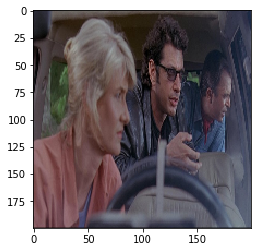

In [6]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))
# cv2.imshow("Fixed Resizing", resized)
# cv2.waitKey(0)
show(resized)

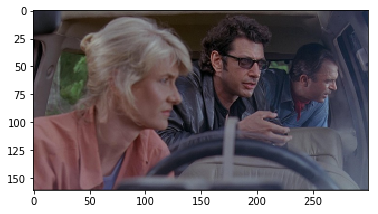

In [7]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
# cv2.imshow("Aspect Ratio Resize", resized)
# cv2.waitKey(0)
show(resized)

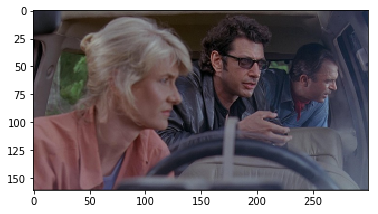

In [8]:
# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=300)
# cv2.imshow("Imutils Resize", resized)
# cv2.waitKey(0)
show(resized)

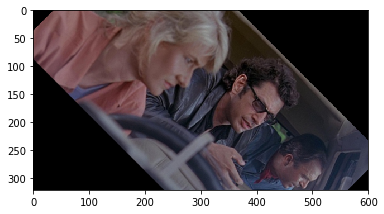

In [9]:
# let's rotate an image 45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
# cv2.imshow("OpenCV Rotation", rotated)
# cv2.waitKey(0)
show(rotated)

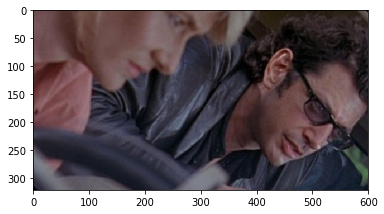

In [10]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center=center, angle=-45, scale=2.0)
rotated = cv2.warpAffine(image, M, (w, h))
# cv2.imshow("OpenCV Rotation", rotated)
# cv2.waitKey(0)
show(rotated)

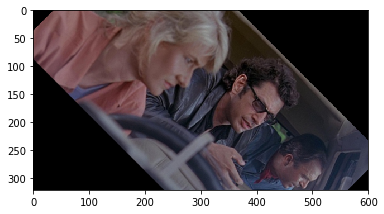

In [11]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
# cv2.imshow("Imutils Rotation", rotated)
# cv2.waitKey(0)
show(rotated)

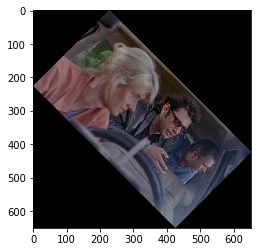

In [12]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated = imutils.rotate_bound(image, 45)
# cv2.imshow("Imutils Bound Rotation", rotated)
# cv2.waitKey(0)
show(rotated)

# check rotated_bound

[Rotate images (correctly) with OpenCV and Python](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/)

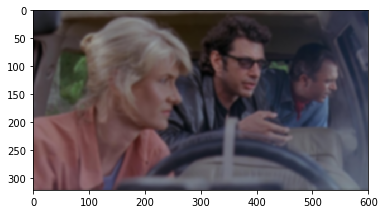

In [13]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
# cv2.imshow("Blurred", blurred)
# cv2.waitKey(0)
show(blurred)

Larger kernels would yield a more blurry image. Smaller kernels will create less blurry images. To read more about kernels, refer to this [blog post](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)

# Draw

## 矩形

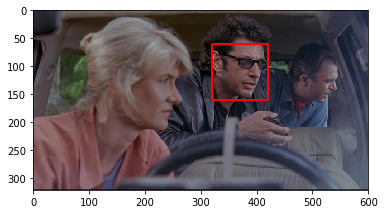

In [14]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, pt1=(320, 60), pt2=(420, 160), color=(0, 0, 255), thickness=2)
# cv2.imshow("Rectangle", output)
# cv2.waitKey(0)
show(output)

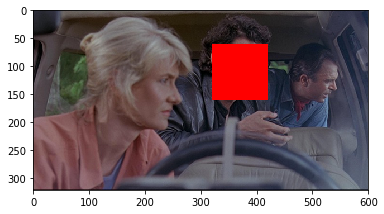

In [15]:
output = image.copy()
cv2.rectangle(output, pt1=(320, 60), pt2=(420, 160), color=(0, 0, 255), thickness=-1)
# cv2.imshow("Rectangle", output)
# cv2.waitKey(0)
show(output)

## 圓形

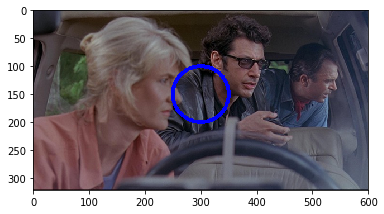

In [16]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, center=(300, 150), radius=50, color=(255, 0, 0), thickness=5)
# cv2.imshow("Circle", output)
# cv2.waitKey(0)
show(output)

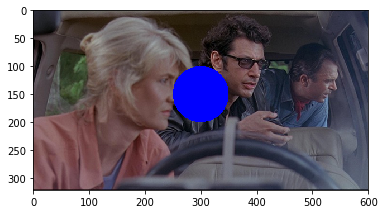

In [17]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, center=(300, 150), radius=50, color=(255, 0, 0), thickness=-1)
# cv2.imshow("Circle", output)
# cv2.waitKey(0)
show(output)

## 橢圓
### cv2.ellipse(影像, 中心座標, 軸長, 旋轉角度, 起始角度, 結束角度, 顏色, 線條寬度)
ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img

Note: 角度是看順時針

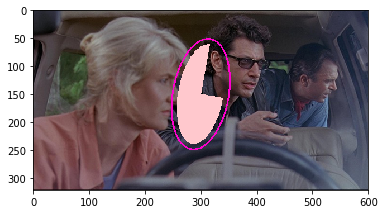

In [27]:
output = image.copy()
cv2.ellipse(
    output, 
    center=(300, 150), 
    axes=(50, 100), 
    angle=10, 
    startAngle=0, 
    endAngle=360, 
    color=(205, 0, 255),
    thickness=2)

cv2.ellipse(
    output, 
    center=(300, 150), 
    axes=(40, 90), 
    angle=10, 
    startAngle=0, 
    endAngle=270, 
    color=(205, 200, 255),
    thickness=-1)
show(output)

# 直線
## cv2.line(影像, 開始座標, 結束座標, 顏色, 線條寬度)
line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img

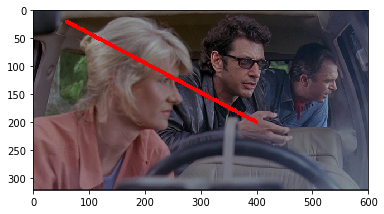

In [28]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, pt1=(60, 20), pt2=(400, 200), color=(0, 0, 255), thickness=5)
# cv2.imshow("Line", output)
# cv2.waitKey(0)
show(output)

# 折線多邊形
## cv2.polylines(影像, 頂點座標, 封閉型, 顏色, 線條寬度)
polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]]) -> img

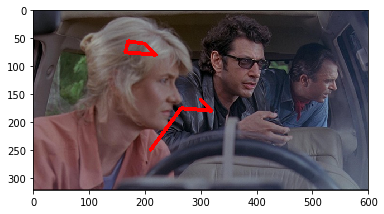

In [38]:
# 設定多邊形頂點座標
pts = np.array([[170, 55], [165, 75], [220, 80], [200, 60]], np.int32)

# 將座標轉為 (頂點數量, 1, 2) 的陣列
pts = pts.reshape((-1, 1, 2))

output = image.copy()
cv2.polylines(output, [pts], isClosed=True, color=(0, 0, 255), thickness=5)

pts = np.array([[210, 250], [265, 175], [320, 180], [300, 160]], np.int32).reshape(-1, 1, 2)
cv2.polylines(output, [pts], isClosed=False, color=(0, 0, 255), thickness=5)

show(output)

# Put Text
## cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img

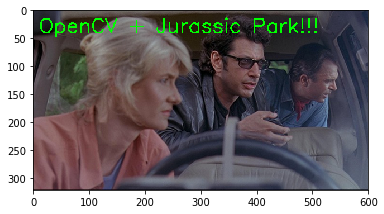

In [51]:
# draw green text on the image
#@param org Bottom-left corner of the text string in the image.
output = image.copy()
cv2.putText(
    output, 
    text="OpenCV + Jurassic Park!!!", 
    org=(10, 40), 
    fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
    fontScale=1.2, color=(0, 255, 0), thickness=2)

# cv2.imshow("Text", output)
# cv2.waitKey(0)
show(output)

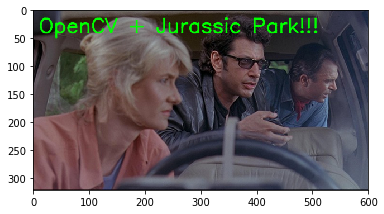

In [56]:
output = image.copy()
cv2.putText(
    output, 
    text="OpenCV + Jurassic Park!!! ", 
    org=(10, 40), 
    fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
    fontScale=1.2, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# cv2.imshow("Text", output)
# cv2.waitKey(0)
show(output)

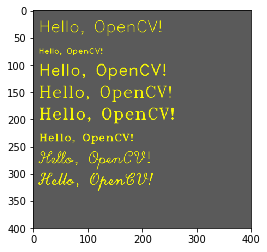

In [43]:
img = np.zeros((400, 400, 3), np.uint8)
img.fill(90)

# 文字
text = 'Hello, OpenCV!'

# 使用各種字體
cv2.putText(img, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 80), cv2.FONT_HERSHEY_PLAIN,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 120), cv2.FONT_HERSHEY_DUPLEX,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 160), cv2.FONT_HERSHEY_COMPLEX,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 200), cv2.FONT_HERSHEY_TRIPLEX,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 240), cv2.FONT_HERSHEY_COMPLEX_SMALL,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 280), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
  1, (0, 255, 255), 1, cv2.LINE_AA)

cv2.putText(img, text, (10, 320), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
  1, (0, 255, 255), 1, cv2.LINE_AA)

show(img)

# 中文字體

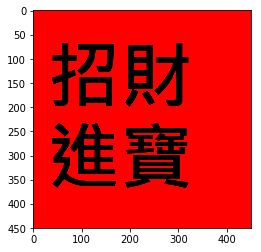

In [60]:
import numpy as np
import cv2
from PIL import ImageFont, ImageDraw, Image

img = np.zeros((450, 450, 3), np.uint8)

# 將背景設定為大紅色
img[:] = (0, 0, 255)

# 文字
text = '招財\n進寶'

# 指定 TTF 字體檔
# fontPath = "./康熙字典體.ttf"
fontPath = 'C:\Windows\Fonts\msjhbd.ttc'

# 載入字體和給定自己大小
font = ImageFont.truetype(fontPath, size=150)

# 將 NumPy 陣列轉為 PIL 影像
imgPil = Image.fromarray(img)

# 在圖片上加入文字
draw = ImageDraw.Draw(imgPil)
draw.text((30, 30),  text, font = font, fill = (0, 0, 0))

# 將 PIL 影像轉回 NumPy 陣列
img = np.array(imgPil)

show(img)

# Part 2

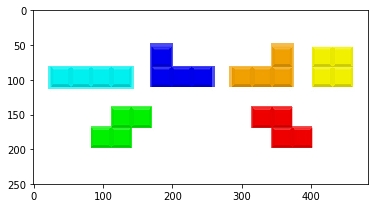

In [3]:
image = cv2.imread('tetris_blocks.png')
show(image)

(250, 482) 2


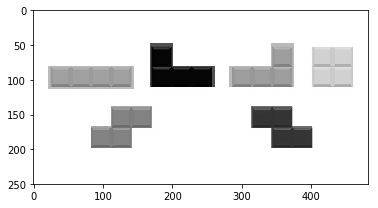

In [12]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape, gray.ndim)
# cv2.imshow("Gray", gray)
# cv2.waitKey(0)
show(gray)

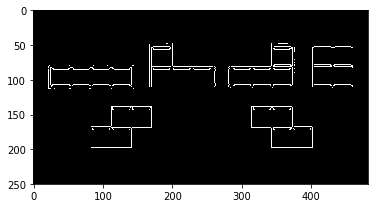

In [14]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, threshold1=30, threshold2=150)
# cv2.imshow("Edged", edged)
# cv2.waitKey(0)
show(edged)

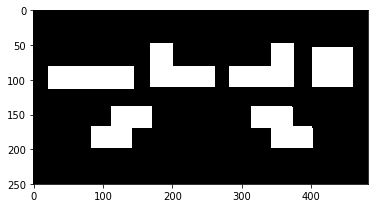

In [22]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 0
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, thresh=225, maxval=255, type=cv2.THRESH_BINARY_INV)[1]
# cv2.imshow("Thresh", thresh)
# cv2.waitKey(0)
show(thresh)

# [Threshold doc](https://docs.opencv.org/3.4.0/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a19120b1a11d8067576cc24f4d2f03754)

In [23]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	cv2.imshow("Contours", output)
	cv2.waitKey(0)
